In [1]:
lincs generate classification-problem 2 2 \
  --denormalized-min-max \
  --allow-decreasing-criteria \
  --random-seed 215214479 >problem.yml
cat problem.yml

# Reproduction command (with lincs version 1.0.1-dev): lincs generate classification-problem 2 2 --random-seed 215214479 --denormalized-min-max --allow-decreasing-criteria
kind: classification-problem
format_version: 1
criteria:
  - name: Criterion 1
    value_type: real
    preference_direction: decreasing
    min_value: -15.1743088
    max_value: 10.2395325
  - name: Criterion 2
    value_type: real
    preference_direction: increasing
    min_value: -15.6781082
    max_value: 58.2910614
ordered_categories:
  - name: Worst category
  - name: Best category


In [2]:
lincs describe classification-problem problem.yml

This a classification problem into 2 ordered categories named "Worst category" and "Best category".
The best category is "Best category" and the worst category is "Worst category".
There are 2 classification criteria (in no particular order).
Criterion "Criterion 1" takes real values between -15.2 and 10.2 included.
Lower values of "Criterion 1" are known to be better.
Criterion "Criterion 2" takes real values between -15.7 and 58.3 included.
Higher values of "Criterion 2" are known to be better.


In [3]:
lincs generate classification-model problem.yml --random-seed 327117407 >model.yml
cat model.yml

# Reproduction command (with lincs version 1.0.1-dev): lincs generate classification-model problem.yml --random-seed 327117407 --model-type mrsort
kind: ncs-classification-model
format_version: 1
accepted_values:
  - kind: thresholds
    thresholds: [-5.13627911]
  - kind: thresholds
    thresholds: [47.9309387]
sufficient_coalitions:
  - kind: weights
    criterion_weights: [0.620743811, 1.4409318]


In [4]:
lincs describe classification-model problem.yml model.yml

This is a MR-Sort (a.k.a. 1-Uc-NCS) model: an NCS model where the sufficient coalitions are specified using the same criterion weights for all boundaries.
The weights associated to each criterion are:
  - Criterion "Criterion 1": 0.62
  - Criterion "Criterion 2": 1.44
To get into an upper category, an alternative must be better than the following profiles on a set of criteria whose weights add up to at least 1:
  - For category "Best category": at most -5.14 on criterion "Criterion 1" and at least 47.93 on criterion "Criterion 2"


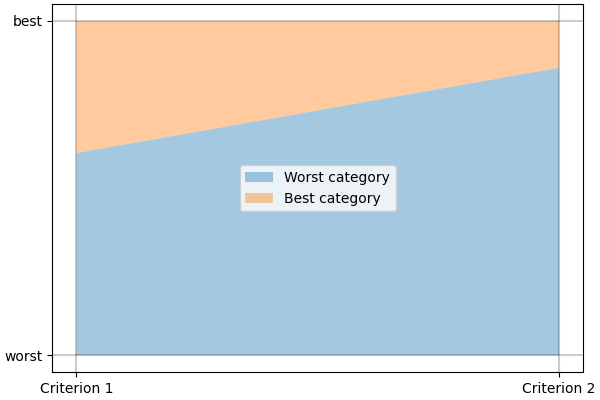

In [5]:
lincs visualize classification-model problem.yml model.yml - | display

In [6]:
lincs generate classified-alternatives problem.yml model.yml 100 --max-imbalance 0.1 --random-seed 802416786 >alternatives.csv
head -n 10 alternatives.csv

# Reproduction command (with lincs version 1.0.1-dev): lincs generate classified-alternatives problem.yml model.yml 100 --random-seed 802416786 --max-imbalance 0.1 --misclassified-count 0
name,"Criterion 1","Criterion 2",category
"Alternative 1",-9.46884727,49.2470016,"Best category"
"Alternative 2",-12.0502529,-8.51298046,"Worst category"
"Alternative 3",8.99883461,12.241766,"Worst category"
"Alternative 4",1.862957,30.5082321,"Worst category"
"Alternative 5",-9.49984741,8.04226685,"Worst category"
"Alternative 6",-9.87778091,10.3676319,"Worst category"
"Alternative 7",-4.93529415,-5.75327969,"Worst category"
"Alternative 8",-14.0705156,28.861702,"Worst category"


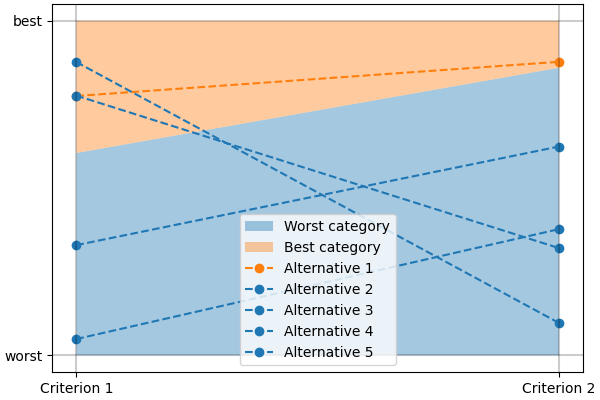

In [7]:
lincs visualize classification-model problem.yml model.yml - --alternatives alternatives.csv --alternatives-count 5 | display

In [8]:
lincs classification-accuracy problem.yml model.yml alternatives.csv

100/100


In [9]:
lincs learn classification-model problem.yml alternatives.csv --mrsort.weights-profiles-breed.accuracy-heuristic.random-seed 80847949

# Reproduction command (with lincs version 1.0.1-dev): lincs learn classification-model problem.yml alternatives.csv --model-type mrsort --mrsort.strategy weights-profiles-breed --mrsort.weights-profiles-breed.models-count 9 --mrsort.weights-profiles-breed.accuracy-heuristic.random-seed 80847949 --mrsort.weights-profiles-breed.initialization-strategy maximize-discrimination-per-criterion --mrsort.weights-profiles-breed.weights-strategy linear-program --mrsort.weights-profiles-breed.linear-program.solver glop --mrsort.weights-profiles-breed.profiles-strategy accuracy-heuristic --mrsort.weights-profiles-breed.accuracy-heuristic.processor cpu --mrsort.weights-profiles-breed.breed-strategy reinitialize-least-accurate --mrsort.weights-profiles-breed.reinitialize-least-accurate.portion 0.5 --mrsort.weights-profiles-breed.target-accuracy 1.0
kind: ncs-classification-model
format_version: 1
accepted_values:
  - kind: thresholds
    thresholds: [-2.37509251]
  - kind: thresholds
    thresholds: